# Определение уязвимых групп населения

## Итоговый проект первого года обучения Skillfactory Data Science Pro

### Часть 3. Анализ результатов кластеризации

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_chisquare

##### 3.1. Описание датасета

In [2]:
df = pd.read_csv(
    'C://Users//Apost//OneDrive//Рабочий стол//social_russia_data//russia_regions_2020_clusters.csv', index_col='region')
df.head(3)

,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,no funds,...,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage,cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,23864.0,30072.0,0.485583,5.093525,88.1,17.4,291156.9,18.0,0.3,0.8642,...,8887,411,647,21.153070,983,59.0,16128.19,26.8,10904.0,0
Амурская область,35499.0,52430.0,0.534827,5.766846,113.3,24.4,571362.1,17.3,1.3,1.0731,...,4967,223,255,22.619247,676,65.0,17998.70,22.4,14331.0,2
Архангельская область без Ненецкого АО,34852.0,52779.0,0.325623,4.674270,64.7,9.2,514200.4,16.9,1.4,1.2998,...,4569,166,288,20.708809,785,60.0,21753.88,26.4,14507.0,2


##### 3.2. Описание кластеров, их характерные особенности в пространстве признаков

In [3]:
df['cluster'].value_counts().sort_index()

cluster
0    27
1     8
2    49
3     1
Name: count, dtype: int64

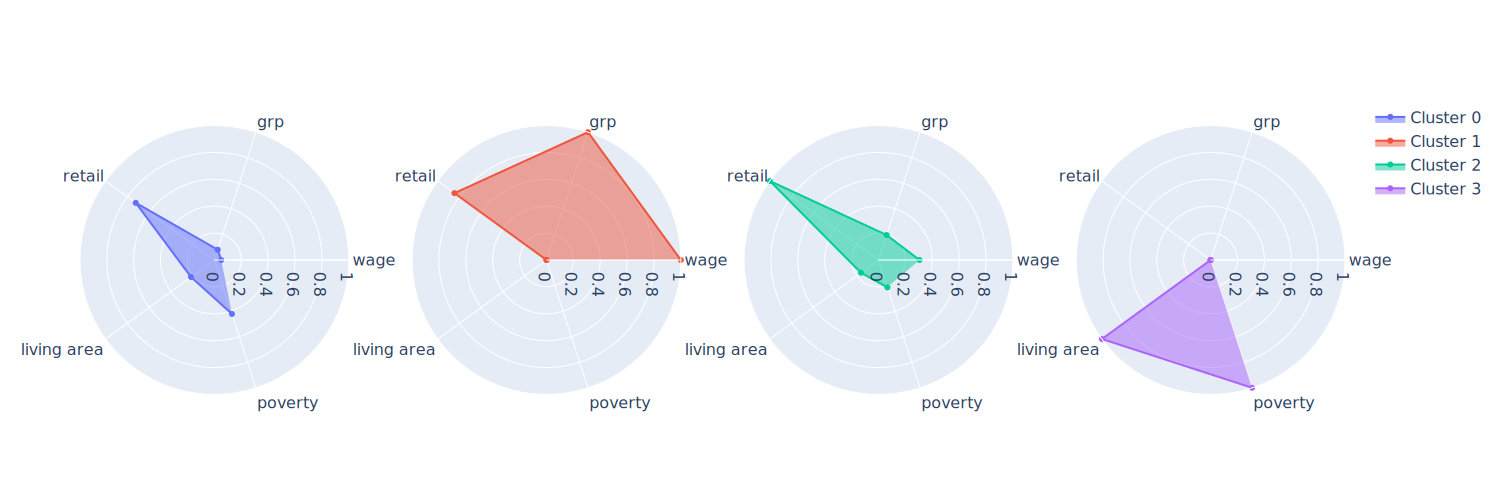

In [4]:
df['formal wage norm'] = df['formal wage'] / df['living wage']
df['retail norm'] = df['retail'] / df['living wage']

cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
medians = df.groupby('cluster')[cols].median()

medians.rename(
    {'formal wage norm': 'wage', 'retail norm': 'retail'}, 
    axis=1, inplace=True)
features = medians.columns
scaler = MinMaxScaler()
medians_scaled = pd.DataFrame(scaler.fit_transform(medians), 
                              columns=features)

fig = make_subplots(rows=1, cols=4, specs=[[{'type': 'polar'}]*4]*1)

fig.add_trace(go.Scatterpolar(  
    name = 'Cluster 0',
    r = medians_scaled.loc[0].values,
    theta = features,
    fill='toself',
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 1',
    r = medians_scaled.loc[1].values,
    theta = features,
    fill='toself'
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
    name = 'Cluster 2',
    r = medians_scaled.loc[2].values,
    theta = features,
    fill='toself'
    ), 1, 3)

fig.add_trace(go.Scatterpolar(
    name = "Cluster 3",
    r = medians_scaled.loc[3].values,
    theta = features,
    fill='toself'
    ), 1, 4)

fig.update_polars(radialaxis=dict(range=[0, 1]))
fig.update_layout(
    font_size=16,
    showlegend=True, # отображение легенды
    autosize=False, # устаналиваем свои размеры графика
    width=1500, 
    height=500) 
fig.show('svg')

In [5]:
display('Медианные значения в числовом выражении:', medians)

'Медианные значения в числовом выражении:'

,wage,grp,retail,living area,poverty
cluster,,,,,
0,2.908770,295304.90,13.593624,17.6,17.20
1,4.910683,2047106.75,15.089111,14.8,7.85
2,3.445114,514200.40,16.955915,16.9,12.60
3,2.802268,142199.70,4.793289,27.8,30.00


In [6]:
df[df['cluster'] == 0].index

Index(['Алтайский край', 'Брянская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область',
       'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика',
       'Кировская область', 'Костромская область', 'Курганская область',
       'Новгородская область', 'Псковская область', 'Республика Алтай',
       'Республика Бурятия', 'Республика Дагестан', 'Республика Калмыкия',
       'Республика Крым', 'Республика Марий Эл', 'Республика Мордовия',
       'Республика Северная Осетия-Алания', 'Республика Тыва',
       'Саратовская область', 'Севастополь', 'Смоленская область',
       'Ульяновская область', 'Чеченская Республика', 'Чувашская Республика'],
      dtype='object', name='region')

In [7]:
df[df['cluster'] == 2].index

Index(['Амурская область', 'Архангельская область без Ненецкого АО',
       'Астраханская область', 'Белгородская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область', 'Воронежская область',
       'Иркутская область', 'Калининградская область', 'Калужская область',
       'Камчатский край', 'Кемеровская область', 'Краснодарский край',
       'Красноярский край', 'Курская область', 'Ленинградская область',
       'Липецкая область', 'Московская область', 'Мурманская область',
       'Нижегородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',
       'Пермский край', 'Приморский край', 'Республика Адыгея',
       'Республика Башкортостан', 'Республика Карелия', 'Республика Коми',
       'Республика Саха (Якутия)', 'Республика Татарстан',
       'Республика Хакасия', 'Ростовская область', 'Рязанская область',
       'Самарская область', 'Свердловская область', 'Ставропольск

In [8]:
df[df['cluster'] == 3].index

Index(['Республика Ингушетия'], dtype='object', name='region')

In [9]:
def kruskal_pvalue(df, col):
    "p-value для заданной колонки (значимость различий по 4-м кластерам)"
    v0 = df[df['cluster'] == 0][col]
    v1 = df[df['cluster'] == 1][col]
    v2 = df[df['cluster'] == 2][col]
    v3 = df[df['cluster'] == 3][col]
    _, p = kruskal(v0, v1, v2, v3)
    return p


cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
for col in cols:
    print(f'{col}:   p-value = {kruskal_pvalue(df, col):.3f}')

formal wage norm:   p-value = 0.000
grp:   p-value = 0.000
retail norm:   p-value = 0.000
living area:   p-value = 0.041
poverty:   p-value = 0.000


In [10]:
def mannwhitney_pvalue(df, col, cl_couple):
    "p-value для пары кластеров (cl_couple) по заданной колонке"
    v0 = df[df['cluster'] == cl_couple[0]][col]
    v1 = df[df['cluster'] == cl_couple[1]][col]
    _, p = mannwhitneyu(v0, v1)
    return p


cols = ['formal wage norm', 'grp', 'retail norm', 'living area', 'poverty']
for col in cols:
    print(f'{col}:   p-value = {mannwhitney_pvalue(df, col, (1, 2)):.3f}')

formal wage norm:   p-value = 0.000
grp:   p-value = 0.000
retail norm:   p-value = 0.261
living area:   p-value = 0.015
poverty:   p-value = 0.000


##### 3.3. Группы населения, сталкивающиеся с бедностью

In [11]:
cols =[
    'the poor: children',
    'the poor: employable', 
    'the poor: retired']
df[cols].mean()

the poor: children      38.720000
the poor: employable    55.656471
the poor: retired        5.631765
dtype: float64

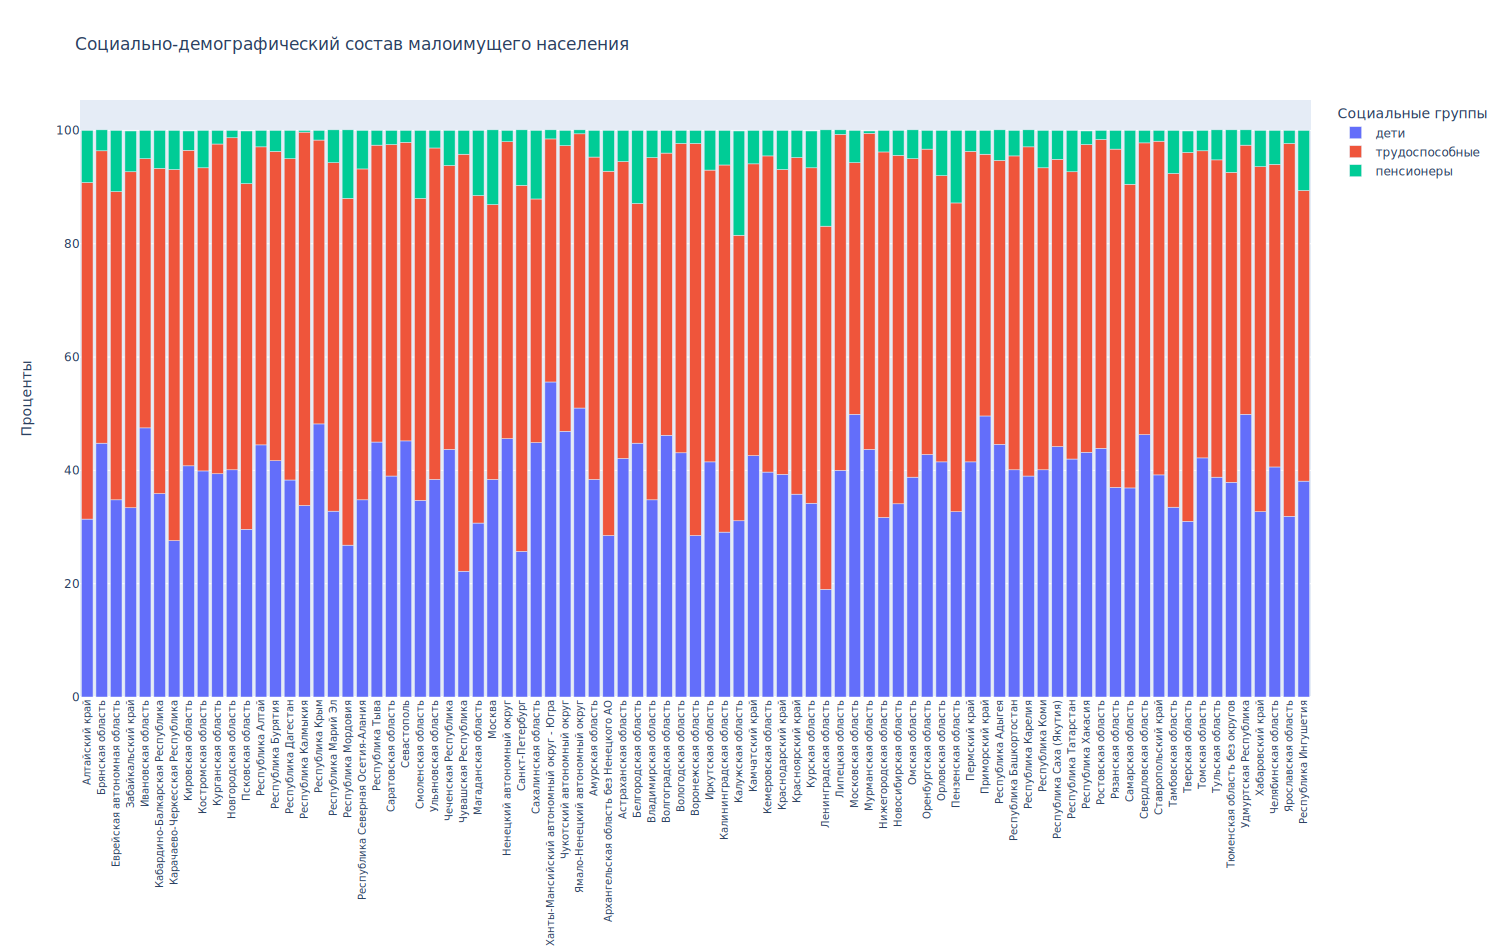

In [12]:
plot_df = df.sort_values(by=['cluster', 'region'])[cols].rename({
    'the poor: children': 'дети',
    'the poor: employable': 'трудоспособные',
    'the poor: retired': 'пенсионеры' 
}, axis=1)
fig = px.bar(plot_df, width=1500, height=950,
    title='Социально-демографический состав малоимущего населения')
fig.layout.xaxis.tickfont.size = 10
fig.update_xaxes(tickangle=270, title=None)
fig.update_yaxes(title='Проценты')
fig.layout.legend.title = 'Социальные группы'
fig.show('svg')

In [13]:
socgroups = df[[
    'population', 'poverty', 'the poor: children',
    'the poor: retired', 'the poor: employable', 
    'children %', 'retired %']].copy()

# Процент трудоспособных
socgroups['employable %'] = (
    100 - socgroups['children %'] - socgroups['retired %']) 

# Количество малоимущих
socgroups['the poor'] = (socgroups['population'] 
    * socgroups['poverty'] / 100).round(0).astype(int)  

# Количество людей в социально-демографических группах
socgroups['children'] = (
    (socgroups['population'] * socgroups['children %'] / 100)
    .round(0).astype(int))  
socgroups['employable'] = (
    (socgroups['population'] * socgroups['employable %'] / 100)
    .round(0).astype(int))  
socgroups['retired'] = (
    (socgroups['population'] * socgroups['retired %'] / 100)
    .round(0).astype(int))  

# Количество малоимущих в социально-демографических группах
socgroups['poor children'] = (  
    (socgroups['the poor'] * socgroups['the poor: children'] / 100)
    .round(0).astype(int))
socgroups['poor employable'] = (  
    (socgroups['the poor'] * socgroups['the poor: employable'] / 100)
    .round(0).astype(int))   
socgroups['poor retired'] = (  
    (socgroups['the poor'] * socgroups['the poor: retired'] / 100)
    .round(0).astype(int))    

# Процент малоимущих в социально-демографических группах
socgroups['poor children %'] = (
    (socgroups['poor children'] / socgroups['children'] * 100))  
socgroups['poor employable %'] = (  
    (socgroups['poor employable'] / socgroups['employable'] * 100))  
socgroups['poor retired %'] = ( 
    (socgroups['poor retired'] / socgroups['retired'] * 100))  

# Среднее по РФ
cols =[
    'poor children %',
    'poor employable %', 
    'poor retired %']
poor_percent = socgroups[cols].mean()
poor_percent

poor children %      24.411145
poor employable %    14.405406
poor retired %        3.435074
dtype: float64

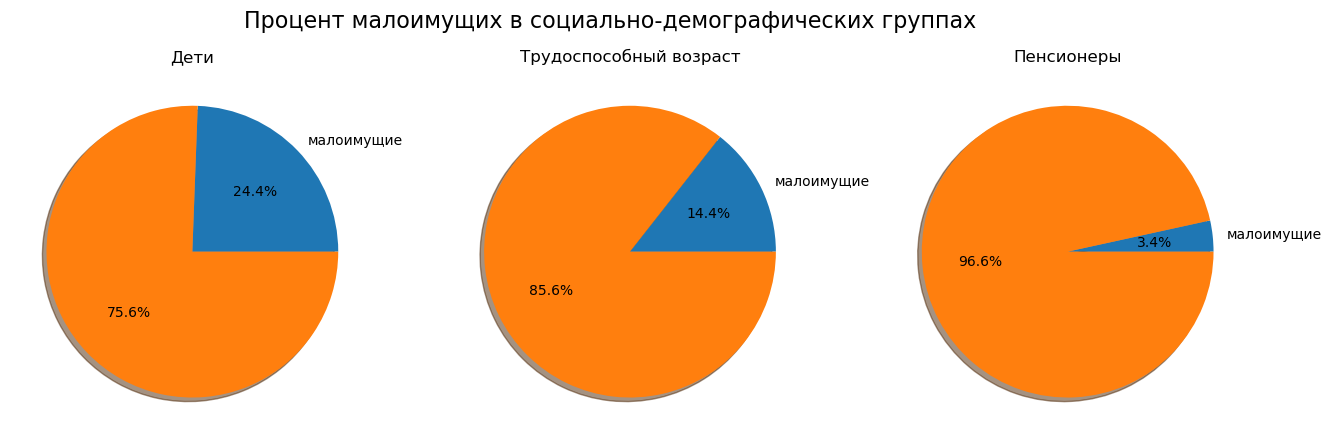

In [14]:
labels = ['малоимущие', '']
fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].pie([poor_percent[0], 100-poor_percent[0]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[1].pie([poor_percent[1], 100-poor_percent[1]], 
          labels=labels, autopct='%1.1f%%', shadow=True)
ax[2].pie([poor_percent[2], 100-poor_percent[2]], 
          labels=labels, autopct='%1.1f%%', shadow=True);
ax[0].set_title('Дети')
ax[1].set_title('Трудоспособный возраст')
ax[2].set_title('Пенсионеры')
fig.suptitle('Процент малоимущих в социально-демографических группах', fontsize=16)
fig.set_facecolor('white');


In [15]:
socgroups['cluster'] = df['cluster']
cluster_socgroups = (socgroups
    .groupby('cluster')[['children', 'employable', 'retired', 'poor children',	
                         'poor employable', 'poor retired']].sum())

cluster_socgroups['poor children %'] = (cluster_socgroups['poor children'] 
                                        / cluster_socgroups['children'] * 100)  
cluster_socgroups['poor employable %'] = (cluster_socgroups['poor employable'] 
                                  / cluster_socgroups['employable'] * 100)  
cluster_socgroups['poor retired %'] = (cluster_socgroups['poor retired'] 
                                       / cluster_socgroups['retired'] * 100) 
cluster_socgroups

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %
cluster,,,,,,,,,
0,6279954,14874251,6576890,1769035,2677327,249090,28.169553,17.999743,3.787352
1,3844605,11851455,5322008,489898,675086,140199,12.742479,5.696229,2.634325
2,20087663,52747410,24657293,4467469,6236227,591905,22.239864,11.822812,2.400527
3,158150,282993,65918,57957,78037,16125,36.646854,27.575594,24.462211


##### 3.4. Взаимосвязь численности социально-демографических групп с уровнем бедности

,children,employable,retired,poor children,poor employable,poor retired,poor children %,poor employable %,poor retired %,population,children %,employable %,retired %
cluster,,,,,,,,,,,,,
0,6279954,14874251,6576890,1769035,2677327,249090,28.169553,17.999743,3.787352,27731095,22.645893,53.637446,23.716662
1,3844605,11851455,5322008,489898,675086,140199,12.742479,5.696229,2.634325,21018068,18.291905,56.386986,25.321109
2,20087663,52747410,24657293,4467469,6236227,591905,22.239864,11.822812,2.400527,97492366,20.604345,54.104144,25.291512
3,158150,282993,65918,57957,78037,16125,36.646854,27.575594,24.462211,507061,31.189541,55.810445,13.000014


Нулевая гипотеза: процент детей в разных кластерах одинаков
chi-square test p-value = 0.0


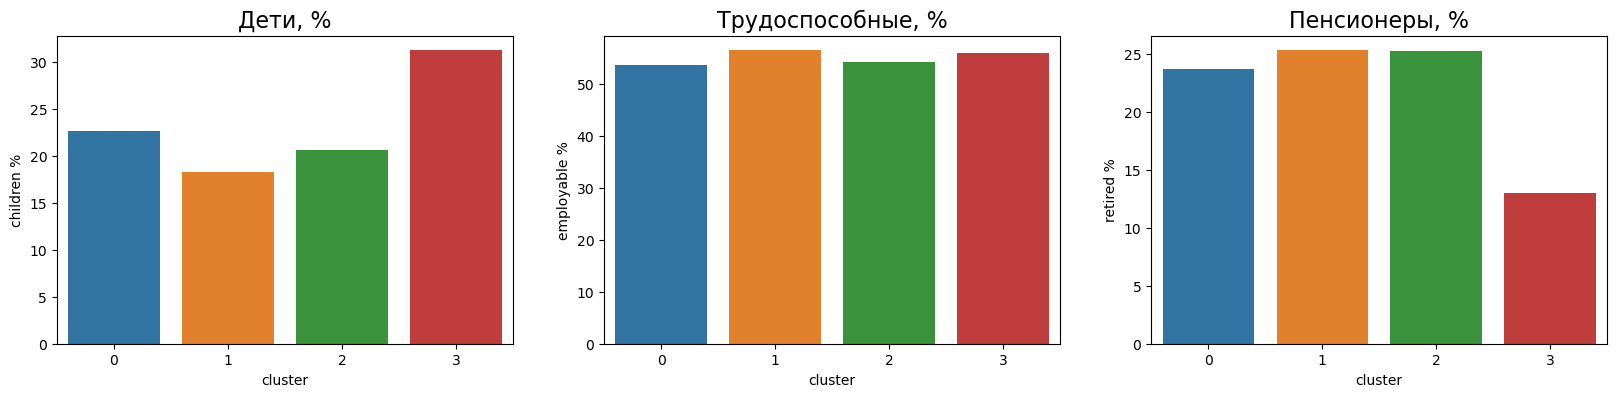

In [16]:
cluster_socgroups['population'] = (df.groupby('cluster')['population']
                                   .sum().astype(int))
cluster_socgroups['children %'] = (cluster_socgroups['children'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['employable %'] = (cluster_socgroups['employable'] 
                                   /  cluster_socgroups['population'] * 100)
cluster_socgroups['retired %'] = (cluster_socgroups['retired'] 
                                   /  cluster_socgroups['population'] * 100)
display(cluster_socgroups)

fig, ax  = plt.subplots(1, 3, figsize=(20, 4))
ax[0].bar(cluster_socgroups.index, cluster_socgroups['children %'])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='children %', ax=ax[0])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='employable %', ax=ax[1])
sns.barplot(data=cluster_socgroups, 
            x=cluster_socgroups.index, y='retired %', ax=ax[2])
ax[0].set_title('Дети, %', fontsize=16)
ax[1].set_title('Трудоспособные, %', fontsize=16)
ax[2].set_title('Пенсионеры, %', fontsize=16)

stat, p, tab = proportions_chisquare(
    cluster_socgroups['children'], cluster_socgroups['population'])
print('Нулевая гипотеза: процент детей в разных кластерах одинаков')
print(f'chi-square test p-value = {p}');

Нулевая гипотеза: рождаемость не зависит от кластера
Kruskal-Wallis p-value = 0.010


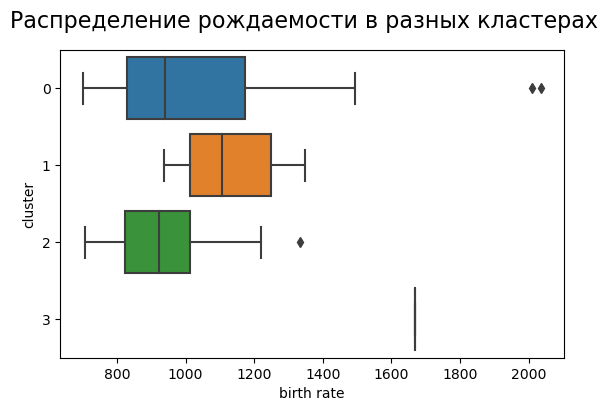

In [17]:
fig = plt.figure(figsize=(6.5, 4))
sns.boxplot(data=df, x='birth rate', y='cluster', orient='h')
fig.suptitle('Распределение рождаемости в разных кластерах',fontsize=16);

print('Нулевая гипотеза: рождаемость не зависит от кластера')
print(f"Kruskal-Wallis p-value = {kruskal_pvalue(df, 'birth rate'):.3f}")

##### 3.5. Другие различия между кластерами

In [18]:
# 1 пропущенное значение заменяем на медиану
df['adopted %'] = df['adopted %'].fillna(df['adopted %'].median()) 
# Нормируем пенсию на размер потребительской корзины
df['pension norm'] = df['pension'] / df['living wage']
# Пересчитываем кол-во преступлений на 100 тыс. населения
df['registered crimes'] = (
    df['registered crimes'] / df['population'] * 100_000)
df['felonies'] = (
    df['felonies'] / df['population'] * 100_000)
df['misdemeanors'] = (
    df['misdemeanors'] / df['population'] * 100_000)
df['killed'] = (
    df['killed'] / df['population'] * 100_000)
df['grievous harm'] = (
    df['grievous harm'] / df['population'] * 100_000)
# Кол-во детей в детских домах на 100 тыс. населения
df['orphanage'] = (
    df['orphanage'] / df['population'] * 100_000)

cols = [
    'child mortality', 'disabled 18_60', 'alco (2018)', 'drug (2018)', 
    'bad conditions', 'no funds', 'morbidity (2016)', 
    'congenital malformation (2016)', 'psychosis (2016)', 
    'teenage pregnancy (2016)', 'population', 'subsidies', 'welfare', 
    'registered crimes', 'felonies', 'misdemeanors', 'killed', 
    'grievous harm', 'orphanage', 'adopted %', 'pension', 
    'pension norm', 'living wage'
]

cols_s = cols.copy()
for col in cols:
    p = kruskal_pvalue(df, col)
    print(f'{col}:   p-value = {p:.3f}')
    if p > 0.05: 
        cols_s.remove(col)

child mortality:   p-value = 0.418
disabled 18_60:   p-value = 0.000
alco (2018):   p-value = 0.148
drug (2018):   p-value = 0.492
bad conditions:   p-value = 0.393
no funds:   p-value = 0.116
morbidity (2016):   p-value = 0.032
congenital malformation (2016):   p-value = 0.177
psychosis (2016):   p-value = 0.067
teenage pregnancy (2016):   p-value = 0.045
population:   p-value = 0.002
subsidies:   p-value = 0.000
welfare:   p-value = 0.000
registered crimes:   p-value = 0.294
felonies:   p-value = 0.277
misdemeanors:   p-value = 0.147
killed:   p-value = 0.380
grievous harm:   p-value = 0.236
orphanage:   p-value = 0.331
adopted %:   p-value = 0.217
pension:   p-value = 0.000
pension norm:   p-value = 0.018
living wage:   p-value = 0.000


Построим графики распределений для значимо отличающихся характеристик.

IndexError: list index out of range

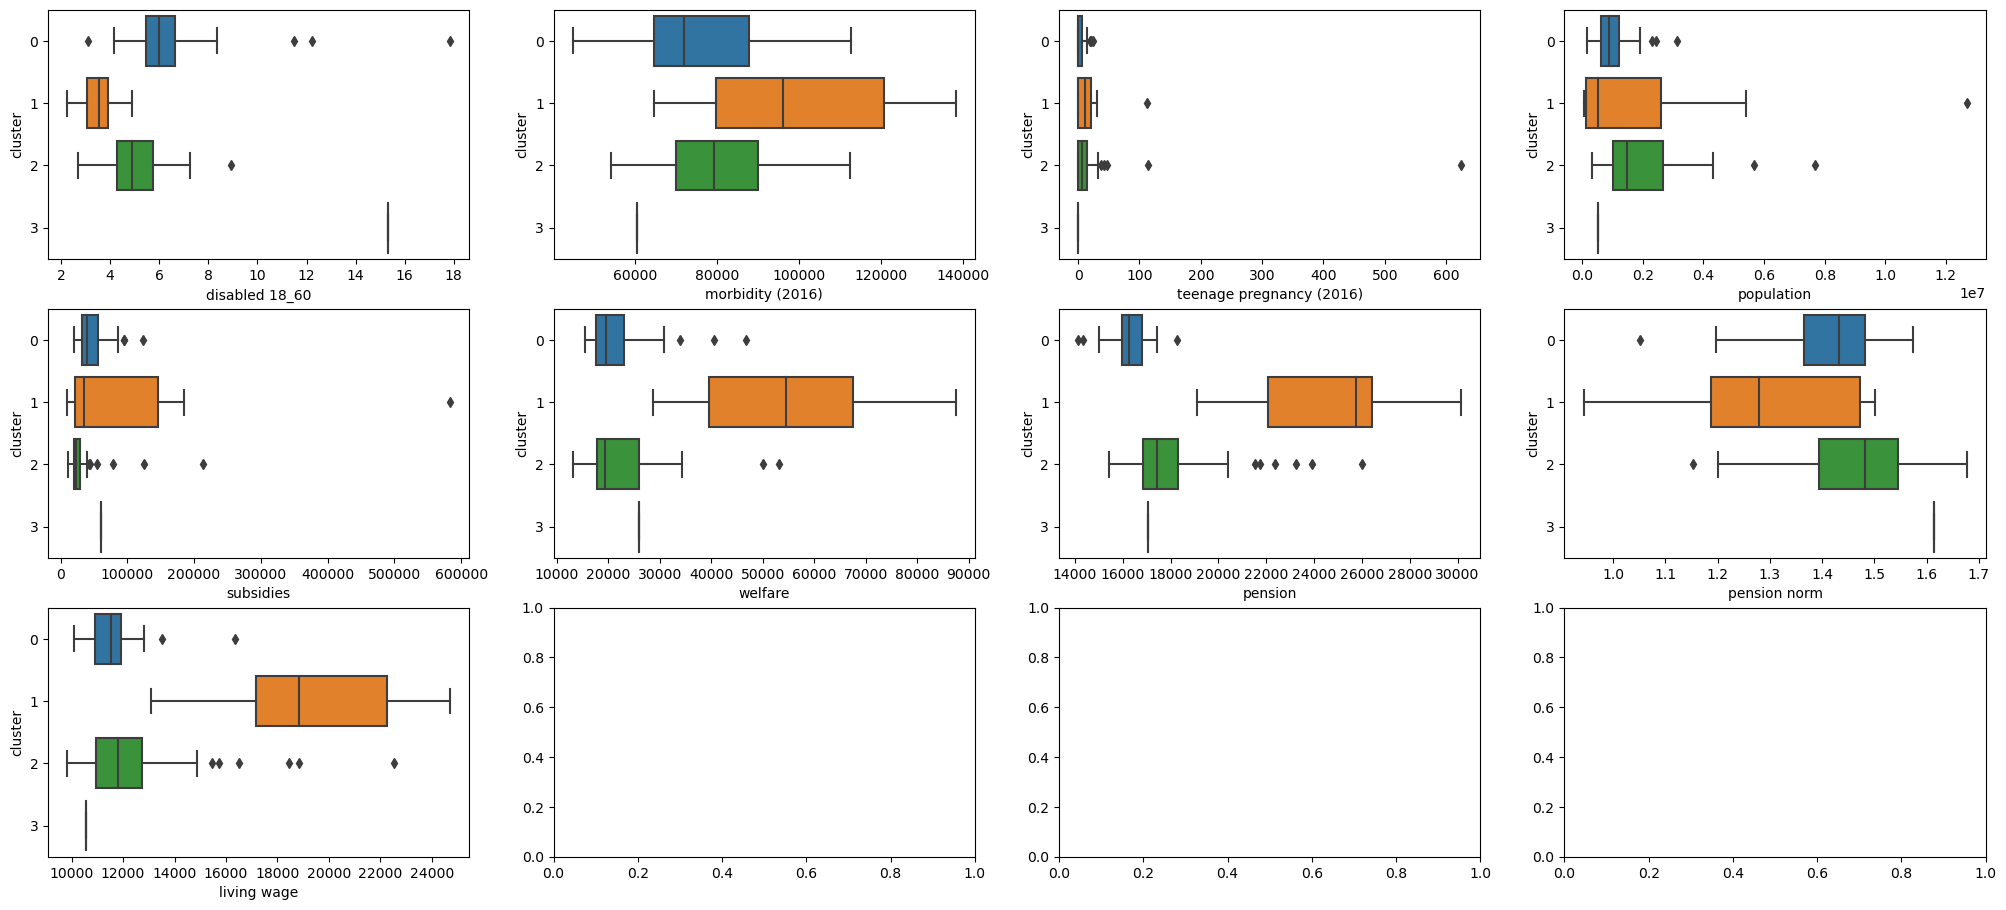

In [24]:
fig, ax = plt.subplots(3, 4, figsize=(25, 11))
i = 0
for row in range(3):
    sns.boxplot(data=df, x=cols_s[i], y='cluster', orient='h', ax=ax[row,0])
    sns.boxplot(data=df, x=cols_s[i+1], y='cluster', orient='h', ax=ax[row,1])
    sns.boxplot(data=df, x=cols_s[i+2], y='cluster', orient='h', ax=ax[row,2])
    sns.boxplot(data=df, x=cols_s[i+3], y='cluster', orient='h', ax=ax[row,3])
    i += 4
fig.suptitle('Распределения различающихся характеристик', 
             fontsize=20)
plt.tight_layout()
# Есть проблема с читабельностью кода, не разобрался где ошибка с выходом за пределы массива данных

In [25]:
col = 'living wage'  # колонка
cluster = 2          # кластер

mask = df['cluster'] == cluster
df[mask][col].sort_values(ascending=False)

region
Камчатский край                           22535.0
Республика Саха (Якутия)                  18853.0
Мурманская область                        18438.0
Хабаровский край                          16510.0
Республика Коми                           15715.0
Республика Карелия                        15438.0
Приморский край                           14872.0
Московская область                        14586.0
Архангельская область без Ненецкого АО    14507.0
Амурская область                          14331.0
Красноярский край                         13839.0
Калининградская область                   12943.0
Иркутская область                         12745.0
Новосибирская область                     12598.0
Томская область                           12566.0
Вологодская область                       12438.0
Республика Хакасия                        12428.0
Тюменская область без округов             12376.0
Ленинградская область                     12231.0
Краснодарский край                        1

##### Вывод

Дано описание характерных особенностей полученных кластеров:

бедные регионы;
среднестатистические регионы;
регионы "комфорт"
бизнес-регионы.
Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми. При этом в кластере наиболее бедных регионов наблюдается аномально высокая рождаемость, необеспеченная доходами родителей, а доля детей среди всего населения на 10% больше, чем в остальных регионах. В остальных группах рождаемость слабо растет с ростом финансового благополучия. При этом процент детского населения падает от кластера бедных регионов к кластерам более богатых. В бедных регионах отмечается существенно более низкий процент населения пенсионного возраста (на 10%).

Также проведен анализ различия других характеристик датасета по кластерам. Подробное описание имеющихся корреляций и отсутствия таковых дано выше.